[1] 모듈 로딩 및 데이터 준비

In [16]:
# 모듈 로딩
import pandas as pd
import numpy as np

In [17]:
# 데이터 준비
DATA_FILE = '../Data/mushrooms.csv'
mushDF = pd.read_csv(DATA_FILE)
mushDF.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [18]:
mushDF.drop('stalk-root', axis=1, inplace=True)
mushDF.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [19]:
mushDF.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [21]:
# 라벨/정수 인코더 인스턴스 생성
lencoder = LabelEncoder()
ohencoder = OneHotEncoder()

In [22]:
# 라벨/정수 인코더의 범위 및 매핑 작업
encoded_list = []
for i in range(len(mushDF.columns)): encoded_list.append(lencoder.fit_transform(mushDF.iloc[:,i]))

In [23]:
encoded_DF = pd.DataFrame(encoded_list)
encoded_DF = encoded_DF.T

In [24]:
encoded_DF.rename(columns={i:mushDF.columns[i] for i in range(22)}, inplace=True)
encoded_DF

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [25]:
mushDF.iloc[:,:2].shape

(8124, 2)

In [26]:
encoded2 = ohencoder.fit_transform(mushDF).toarray()
encoded2.shape

(8124, 114)

In [27]:
encoded_DF2 = pd.DataFrame(encoded2)
encoded_DF2

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# encoded2.get_feature_names_out()

In [29]:
featuresDF = encoded_DF.iloc[:,1:]
targetSR = encoded_DF['class']

[2] 학습용 데이터셋 준비

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
x_train, x_test, y_train, y_test = train_test_split(featuresDF,
                                                    targetSR,
                                                    stratify=targetSR,
                                                    random_state=10)

In [32]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'x_test : {x_test.shape}, {x_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (6093, 21), 2D
x_test : (2031, 21), 2D
y_train : (6093,), 1D
y_test : (2031,), 1D


[3] 기본학습

In [33]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [34]:
# 모델 파라미터 : 학습 fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_]: {dt_model.classes_}')
print(f'[dt_model.n_classes_]: {dt_model.n_classes_}')
print(f'[dt_model.max_features_]: {dt_model.max_features_}')
print(f'[dt_model.feature_importances_]: {dt_model.feature_importances_}')
print(f'[dt_model.feature_names_in_]: {dt_model.feature_names_in_}')

[dt_model.classes_]: [0 1]
[dt_model.n_classes_]: 2
[dt_model.max_features_]: 21
[dt_model.feature_importances_]: [0.         0.         0.00385406 0.02875376 0.03662531 0.
 0.         0.11781918 0.34525098 0.02330334 0.         0.00213117
 0.         0.01953426 0.         0.         0.00067253 0.00245407
 0.20427024 0.17388996 0.04144114]
[dt_model.feature_names_in_]: ['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']


- 성능 체크

In [35]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(x_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(x_test, y_test)

print(f'train_score : test_score = {train_score} : {test_score}')

train_score : test_score = 1.0 : 1.0


[4] 교차 검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [36]:
from sklearn.model_selection import cross_validate

In [37]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5[기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result=cross_validate(dt_model2, x_train, y_train,
               return_train_score=True,
               return_estimator=True)

In [38]:
# dict => DataFrame
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.010999,0.003632,DecisionTreeClassifier(random_state=1),1.0,1.0
1,0.000000,0.000000,DecisionTreeClassifier(random_state=1),1.0,1.0
2,0.000000,0.000000,DecisionTreeClassifier(random_state=1),1.0,1.0
3,0.015623,0.000000,DecisionTreeClassifier(random_state=1),1.0,1.0
4,0.000000,0.000000,DecisionTreeClassifier(random_state=1),1.0,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼 파라미터 설정

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# 하이퍼파라미터 dict 생성
params = {'max_depth':[4,3,2,1],
          'min_samples_leaf':[5,3,2]}

In [41]:
dtcv = GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True)
dtcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]})

In [42]:
# 모델 파라미터 확인

print(f'[dtcv.best_params_]: {dtcv.best_params_}')
print(f'[dtcv.best_score_]: {dtcv.best_score_}')
print(f'[dtcv.best_estimator_]: {dtcv.best_estimator_}')
# print(f'[dtcv.cv_results_]: {dtcv.cv_results_}')

[dtcv.best_params_]: {'max_depth': 4, 'min_samples_leaf': 5}
[dtcv.best_score_]: 0.9776784114681204
[dtcv.best_estimator_]: DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)


In [43]:
cv_resultDF = pd.DataFrame(dtcv.cv_results_)
cv_resultDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004667,0.004450,0.000705,0.001199,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.979491,0.982773,0.976210,0.978654,0.971264,0.977678,0.003834,1
1,0.005226,0.006345,0.000490,0.000615,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.979491,0.982773,0.976210,0.978654,0.971264,0.977678,0.003834,1
2,0.004532,0.004808,0.002990,0.003706,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.979491,0.982773,0.976210,0.978654,0.971264,0.977678,0.003834,1
3,0.003033,0.002065,0.000816,0.000772,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.957342,0.958983,0.956522,0.954023,0.958949,0.957164,0.001833,4
4,0.003965,0.006129,0.000334,0.000668,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.957342,0.958983,0.956522,0.954023,0.958949,0.957164,0.001833,4
5,0.006268,0.007676,0.000000,0.000000,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.957342,0.958983,0.956522,0.954023,0.958949,0.957164,0.001833,4
6,0.003295,0.006164,0.000000,0.000000,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.915505,0.909762,0.900738,0.914614,0.915435,0.911211,0.005650,7
7,0.003313,0.006626,0.003145,0.006290,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.915505,0.909762,0.900738,0.914614,0.915435,0.911211,0.005650,7
8,0.003383,0.006765,0.000000,0.000000,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.915505,0.909762,0.900738,0.914614,0.915435,0.911211,0.005650,7
9,0.003125,0.006251,0.000000,0.000000,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.784249,0.786710,0.777687,0.799672,0.797209,0.789105,0.008210,10


In [44]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

- 주요 피쳐 시각화

In [45]:
# 가장 좋은 모델
best_model = dtcv.best_estimator_
print(f'[best_model.max_depth]: {best_model.max_depth}')
print(f'[best_model.min_samples_leaf]: {best_model.min_samples_leaf}')

[best_model.max_depth]: 4
[best_model.min_samples_leaf]: 5


In [46]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.        , 0.        , 0.        , 0.        , 0.03942011,
        0.        , 0.        , 0.14089301, 0.36481161, 0.03186632,
        0.        , 0.0022938 , 0.        , 0.        , 0.        ,
        0.        , 0.01641562, 0.        , 0.20863516, 0.18715913,
        0.00850524]),
 21)

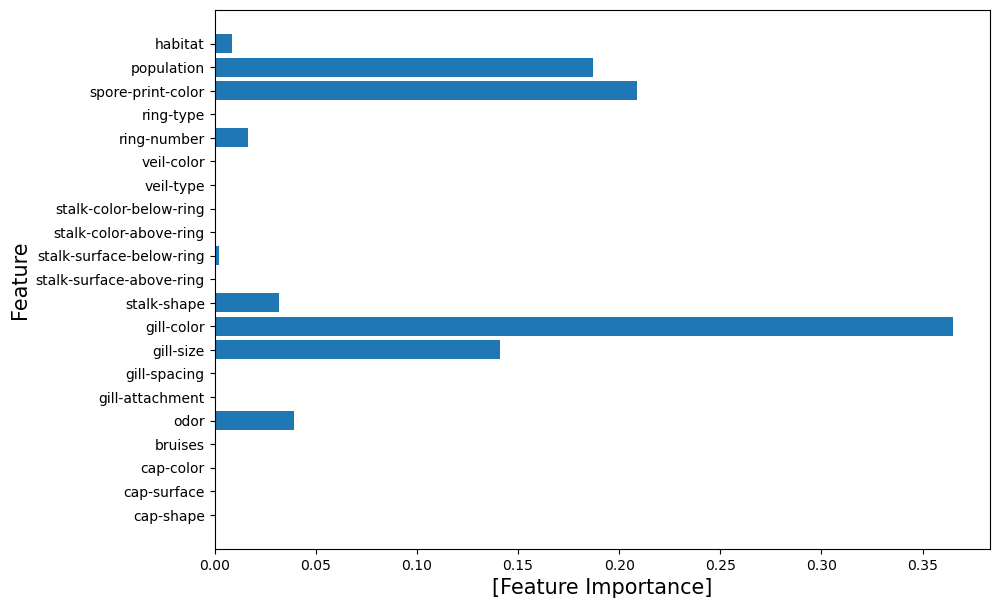

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]', size=15)
plt.ylabel('Feature', size=15)
plt.show()

- DT 그래프 시각화

In [48]:
## [1] DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()

from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='mushroom_tree.dot',
                class_names=cv_resultDF.columns,
                feature_names=best_model.feature_names_in_,
                impurity=True,
                filled=True,
                rounded=True)

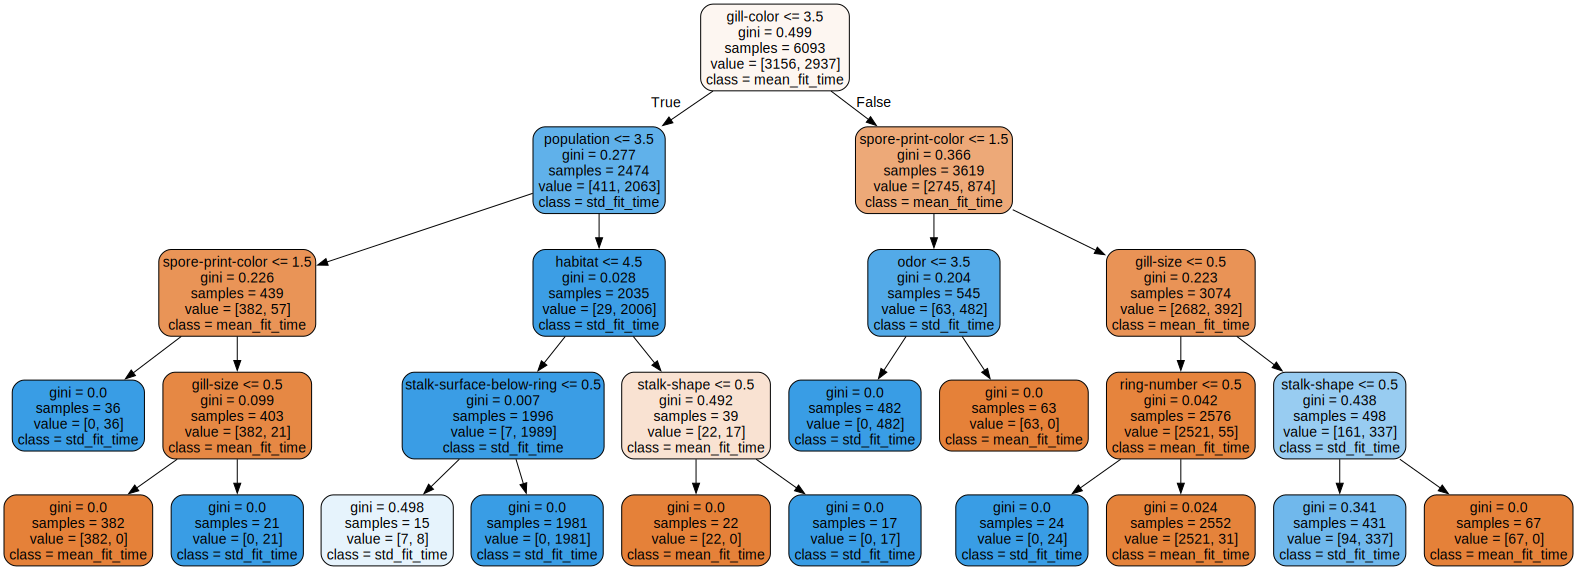

In [49]:
## [2] dot파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('mushroom_tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6] 독버섯 예측

In [50]:
# this_mushroom = 
# this_mushroom.shape

In [51]:
# best_model.predict(this_mushroom)

In [52]:
# best_model.predict_proba(this_mushroom)

#### 앙상블(ENSEMBLE) - Voting 방식
- 결과도출 : Hard(직접), Soft(간접)

학습 진행 ==> 앙상블의 보팅 방식 진행
- 데이터셋 동일
- 알고리즘 모델 : KNeighborsClassifier, LogisticRegression, DecisionTreeClassfier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [54]:
# 알고리즘 인스턴스 생성
k_model = KNeighborsClassifier()
dt2_model = DecisionTreeClassifier(random_state=10)
lr_model = LogisticRegression(solver='liblinear')

In [55]:
# 보팅인스턴스 생성
v_model = VotingClassifier(estimators=[('k_model', k_model), ('dt2_model', dt2_model), ('lr_model', lr_model)],
                           voting='hard')
vs_model = VotingClassifier(estimators=[('k_model', k_model), ('dt2_model', dt2_model), ('lr_model', lr_model)],
                           voting='soft')

In [56]:
# 학습 진행
v_model.fit(x_train.values, y_train.values) # hard 즉, 직접 선거 방식
vs_model.fit(x_train.values, y_train.values) # soft 즉, 간접 선거 방식으로 모델마다 확률값 합계에 평균

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('dt2_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [57]:
# 모델 파라미터 확인
print(f'[v_model.classes_] : {v_model.classes_}')
print(f'[v_model.estimators_] : {v_model.estimators_}')
print(f'[v_model.named_estimators_] : {v_model.named_estimators_}')

print(f'[v_model.n_features_in_] : {v_model.n_features_in_}')
# print(f'[v_model.feature_names_in_] : {v_model.feature_names_in_}') # fit() 할때 DataFrame 전달한 경우

[v_model.classes_] : [0 1]
[v_model.estimators_] : [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]
[v_model.named_estimators_] : {'k_model': KNeighborsClassifier(), 'dt2_model': DecisionTreeClassifier(random_state=10), 'lr_model': LogisticRegression(solver='liblinear')}
[v_model.n_features_in_] : 21


성능 확인 => trainDS과 (validation DS), 없어서 testDS

In [58]:
train_score2 = v_model.score(x_train.values, y_train.values)
test_score2 = v_model.score(x_test.values, y_test.values)

soft_train_score2 = vs_model.score(x_train.values, y_train.values)
soft_test_score2 = vs_model.score(x_test.values, y_test.values)

In [59]:
print(f'[hard voting] train_score2 : test_score2 = {train_score2} : {test_score2}')
print(f'[soft voting] soft_train_score2 : soft_test_score2 = {soft_train_score2} : {soft_test_score2}')

[hard voting] train_score2 : test_score2 = 0.9998358772361726 : 1.0
[soft voting] soft_train_score2 : soft_test_score2 = 1.0 : 1.0


In [60]:
from sklearn.metrics import classification_report